# Baseline model experiments report

## Table of contents:

* [Experiment #1](#exp-01)
* [Experiment #2](#exp-02)
* [Experiment #3](#exp-03)
* [Experiment #4](#exp-04)
* [Experiment #5](#exp-05)


* [Experiment #3 | tests](#exp-03-t)


* [Experiment #5 | tests](#exp-05-t)


* [References](#ref)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yaml
import pickle

In [2]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('..')))

In [3]:
import torch
import torchvision

import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

from stochastic_predictors.modules.model.cnn import StochasticCNN

%reload_ext autoreload
%autoreload 2

In [4]:
os.chdir('../modules')

### Helper functions

In [5]:
def plot_history(n_exp):
    with open(f'../experiments/exp-b{n_exp}/baseline-{n_exp}-history.pickle', 'rb') as history:
        history = pickle.load(history)

    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].plot(history["train_likl"], 'o-', label="train")
    axs[0].plot(history["val_likl"], '^-', label="validation")
    axs[0].set_title("Likelihood")
    axs[0].set_xlabel("epoch")
    axs[0].legend()

    axs[1].plot(history["train_acc"], 'o-', label="train")
    axs[1].plot(history["val_acc"], '^-', label="validation")
    axs[1].set_title("Accuracy")
    axs[1].set_xlabel("epoch")
    axs[1].legend()

    plt.show() 

### Baseline model | experiment #1 <a class="anchor" id="exp-01"></a>

**Architecture:**
```
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (3): Sigmoid()
  (4): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (5): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (6): Sigmoid()
  (7): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (8): Sigmoid()
  (9): Conv2d(48, 96, kernel_size=(2, 2), stride=(2, 2))
  (10): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
  (11): Sigmoid()
  (12): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=96, out_features=50, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=50, out_features=10, bias=True)
)
```

**Number of epochs:** 100

**Learning rate**: `1e-3`

**Loss**: negative likelihood

In [6]:
# %%script false --no-raise-error

!python main.py -c ../experiments/exp-b01/config-b01.yaml

reading config file...
setting up the experiment...
building model...
100%|█████████████████████████████████████████| 17/17 [00:00<00:00, 3497.65it/s]

model:
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (3): Sigmoid()
  (4): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (5): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (6): Sigmoid()
  (7): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (8): Sigmoid()
  (9): Conv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (10): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (11): Sigmoid()
  (12): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=96, out_features=50, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=50, out_features=10, bias=True)
)

training...

Epoch: 1 / 100
	train likelihood: 0.34364175962607063, val likelihood: 0.5155651039123536
	t

	train likelihood: 0.8652461895624797, val likelihood: 0.8467505214691162
	train accuracy 0.8663, val accuracy: 0.8496
Epoch: 54 / 100
	train likelihood: 0.8661513538042704, val likelihood: 0.8525933465957641
	train accuracy 0.8670666666666667, val accuracy: 0.854
Epoch: 55 / 100
	train likelihood: 0.8672581020991007, val likelihood: 0.8509297328948975
	train accuracy 0.8681666666666666, val accuracy: 0.851
Epoch: 56 / 100
	train likelihood: 0.8659904468218486, val likelihood: 0.8497921277999878
	train accuracy 0.8667166666666667, val accuracy: 0.8511
Epoch: 57 / 100
	train likelihood: 0.8673696196873982, val likelihood: 0.8431102682113647
	train accuracy 0.8689833333333333, val accuracy: 0.8444
Epoch: 58 / 100
	train likelihood: 0.8684686957677206, val likelihood: 0.8620315176010132
	train accuracy 0.8696, val accuracy: 0.8627
Epoch: 59 / 100
	train likelihood: 0.8689208175023396, val likelihood: 0.8568904742240906
	train accuracy 0.8701333333333333, val accuracy: 0.8578
Epoch: 60 / 1

<Figure size 640x480 with 0 Axes>

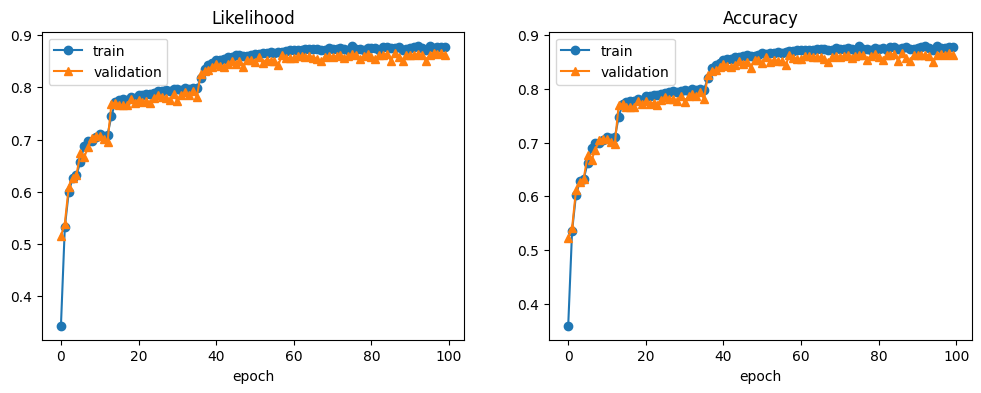

In [7]:
plot_history("01")

### Baseline model | experiment #2 <a class="anchor" id="exp-02"></a>

Added batch normalization.

**Architecture:**
```
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (3): Sigmoid()
  (4): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (5): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (7): Sigmoid()
  (8): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (9): Sigmoid()
  (10): Conv2d(48, 96, kernel_size=(2, 2), stride=(2, 2))
  (11): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
  (13): Sigmoid()
  (14): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=96, out_features=50, bias=True)
  (17): Sigmoid()
  (18): Linear(in_features=50, out_features=10, bias=True)
)
```

**Number of epochs:** 100

**Learning rate**: `1e-3`

**Loss**: negative likelihood

In [8]:
# %%script false --no-raise-error

!python main.py -c ../experiments/exp-b02/config-b02.yaml

reading config file...
setting up the experiment...
building model...
100%|█████████████████████████████████████████| 20/20 [00:00<00:00, 3054.74it/s]

model:
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (3): Sigmoid()
  (4): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (5): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (7): Sigmoid()
  (8): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (9): Sigmoid()
  (10): Conv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (11): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (13): Sigmoid()
  (14): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (15): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Flatten(start

	train likelihood: 0.926387156232198, val likelihood: 0.8934114692687988
	train accuracy 0.9272333333333334, val accuracy: 0.895
Epoch: 51 / 100
	train likelihood: 0.927422670841217, val likelihood: 0.8930671830177307
	train accuracy 0.9287333333333333, val accuracy: 0.8931
Epoch: 52 / 100
	train likelihood: 0.9280107334136963, val likelihood: 0.8919960391998291
	train accuracy 0.9292333333333334, val accuracy: 0.8921
Epoch: 53 / 100
	train likelihood: 0.9269628677050272, val likelihood: 0.891378451347351
	train accuracy 0.9281166666666667, val accuracy: 0.891
Epoch: 54 / 100
	train likelihood: 0.9286531010627747, val likelihood: 0.8896150623321534
	train accuracy 0.9296833333333333, val accuracy: 0.8901
Epoch: 55 / 100
	train likelihood: 0.9286715859731038, val likelihood: 0.8971617257118225
	train accuracy 0.92965, val accuracy: 0.8978
Epoch: 56 / 100
	train likelihood: 0.928994625155131, val likelihood: 0.8928221574783325
	train accuracy 0.9297333333333333, val accuracy: 0.894
Epoch

<Figure size 640x480 with 0 Axes>

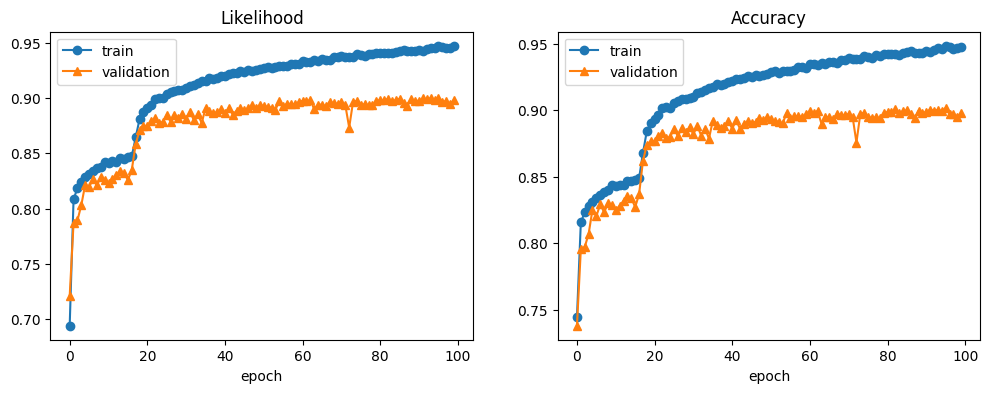

In [9]:
plot_history("02")

**! overfitting**

### Baseline model | experiment #3 <a class="anchor" id="exp-03"></a>

Added batch normalization and dropout.

**Architecture:**
```
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Dropout(p=0.6, inplace=False)
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (4): Sigmoid()
  (5): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (6): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (8): Sigmoid()
  (9): Dropout(p=0.6, inplace=False)
  (10): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (11): Sigmoid()
  (12): Conv2d(48, 96, kernel_size=(2, 2), stride=(2, 2))
  (13): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
  (15): Sigmoid()
  (16): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (17): Flatten(start_dim=1, end_dim=-1)
  (18): Linear(in_features=96, out_features=50, bias=True)
  (19): Sigmoid()
  (20): Linear(in_features=50, out_features=10, bias=True)
)
```

**Number of epochs:** 100

**Learning rate**: `1e-3`

**Loss**: negative likelihood

In [10]:
# %%script false --no-raise-error

!python main.py -c ../experiments/exp-b03/config-b03.yaml

reading config file...
setting up the experiment...
building model...
100%|█████████████████████████████████████████| 22/22 [00:00<00:00, 8911.98it/s]

model:
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Dropout(p=0.6, inplace=False)
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (4): Sigmoid()
  (5): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (6): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (8): Sigmoid()
  (9): Dropout(p=0.6, inplace=False)
  (10): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (11): Sigmoid()
  (12): Conv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (13): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (15): Sigmoid()
  (16): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (17): BatchNorm2d(96, eps=1e-05

	train likelihood: 0.8228340256055197, val likelihood: 0.825800414276123
	train accuracy 0.8236333333333333, val accuracy: 0.8261
Epoch: 51 / 100
	train likelihood: 0.8233565116882324, val likelihood: 0.8277786556243897
	train accuracy 0.8242, val accuracy: 0.8278
Epoch: 52 / 100
	train likelihood: 0.8236211440404256, val likelihood: 0.827009543132782
	train accuracy 0.8242166666666667, val accuracy: 0.8275
Epoch: 53 / 100
	train likelihood: 0.8241069804509481, val likelihood: 0.8234811017036437
	train accuracy 0.8246, val accuracy: 0.8238
Epoch: 54 / 100
	train likelihood: 0.8220254165649414, val likelihood: 0.8247472623825073
	train accuracy 0.8226333333333333, val accuracy: 0.825
Epoch: 55 / 100
	train likelihood: 0.8242885509173076, val likelihood: 0.8239173259735108
	train accuracy 0.825, val accuracy: 0.8241
Epoch: 56 / 100
	train likelihood: 0.825787637424469, val likelihood: 0.8257454478263855
	train accuracy 0.8263166666666667, val accuracy: 0.8266
Epoch: 57 / 100
	train likel

<Figure size 640x480 with 0 Axes>

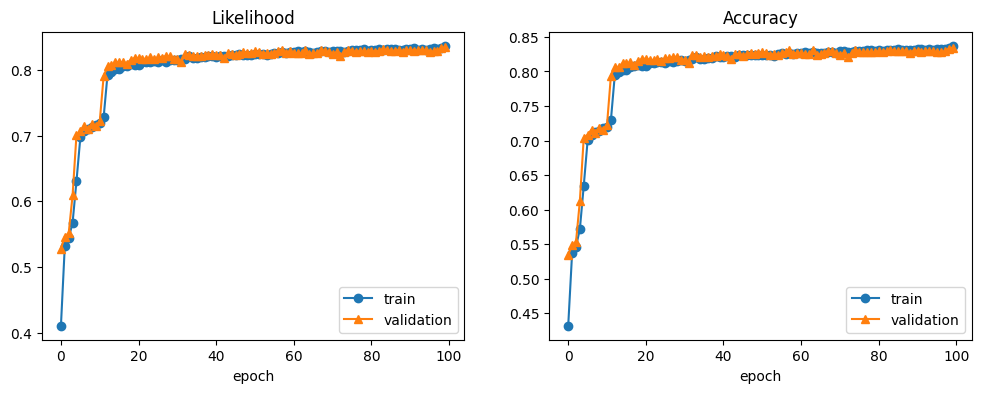

In [11]:
plot_history("03")

### Baseline model | experiment #4 <a class="anchor" id="exp-04"></a>

Added batch normalization and dropiut, increased feature space dimensionality from 96 to **144**.


**Architecture:**
```
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Dropout(p=0.6, inplace=False)
  (3): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1))
  (4): Sigmoid()
  (5): Conv2d(18, 18, kernel_size=(2, 2), stride=(2, 2))
  (6): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Conv2d(18, 36, kernel_size=(3, 3), stride=(1, 1))
  (8): Sigmoid()
  (9): Dropout(p=0.6, inplace=False)
  (10): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1))
  (11): Sigmoid()
  (12): Conv2d(72, 72, kernel_size=(2, 2), stride=(2, 2))
  (13): BatchNorm2d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1))
  (15): Sigmoid()
  (16): Conv2d(144, 144, kernel_size=(2, 2), stride=(2, 2))
  (17): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (18): Flatten(start_dim=1, end_dim=-1)
  (19): Linear(in_features=144, out_features=70, bias=True)
  (20): Sigmoid()
  (21): Linear(in_features=70, out_features=10, bias=True)
)
```

**Number of epochs:** 100

**Learning rate**: `1e-3`

**Loss**: negative likelihood

In [12]:
# %%script false --no-raise-error

!python main.py -c ../experiments/exp-b04/config-b04.yaml

reading config file...
setting up the experiment...
building model...
100%|█████████████████████████████████████████| 22/22 [00:00<00:00, 6797.40it/s]

model:
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): Sigmoid()
  (2): Dropout(p=0.6, inplace=False)
  (3): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1))
  (4): Sigmoid()
  (5): Conv2d(18, 18, kernel_size=(2, 2), stride=(2, 2))
  (6): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Conv2d(18, 36, kernel_size=(3, 3), stride=(1, 1))
  (8): Sigmoid()
  (9): Dropout(p=0.6, inplace=False)
  (10): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1))
  (11): Sigmoid()
  (12): Conv2d(72, 72, kernel_size=(2, 2), stride=(2, 2))
  (13): BatchNorm2d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1))
  (15): Sigmoid()
  (16): Conv2d(144, 144, kernel_size=(2, 2), stride=(2, 2))
  (17): BatchNorm2d(144, eps=1

	train likelihood: 0.866373284626007, val likelihood: 0.8685523250579834
	train accuracy 0.8673833333333333, val accuracy: 0.8691
Epoch: 51 / 100
	train likelihood: 0.8664279151598613, val likelihood: 0.8667194616317749
	train accuracy 0.86735, val accuracy: 0.8674
Epoch: 52 / 100
	train likelihood: 0.8671533623377482, val likelihood: 0.8676924368858338
	train accuracy 0.8681833333333333, val accuracy: 0.8693
Epoch: 53 / 100
	train likelihood: 0.8673231037457784, val likelihood: 0.8734072228431702
	train accuracy 0.8682333333333333, val accuracy: 0.8738
Epoch: 54 / 100
	train likelihood: 0.8689947270711263, val likelihood: 0.8732930618286133
	train accuracy 0.8703333333333333, val accuracy: 0.874
Epoch: 55 / 100
	train likelihood: 0.8677782028198242, val likelihood: 0.8756492308616638
	train accuracy 0.8690166666666667, val accuracy: 0.8767
Epoch: 56 / 100
	train likelihood: 0.870453832244873, val likelihood: 0.8776630264282227
	train accuracy 0.8715, val accuracy: 0.8787
Epoch: 57 / 1

<Figure size 640x480 with 0 Axes>

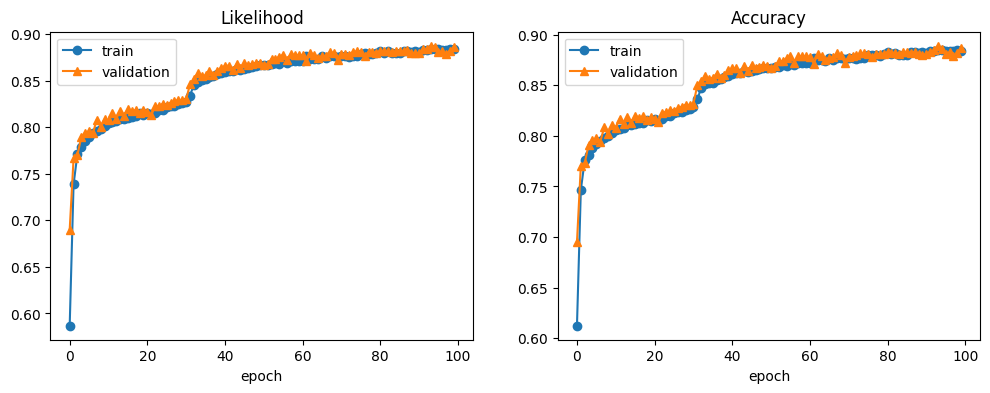

In [13]:
plot_history("04")

### Baseline model | experiment #5 <a class="anchor" id="exp-05"></a>

**Architecture:**
```
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Sigmoid()
  (6): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (7): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (9): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Sigmoid()
  (11): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (12): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Sigmoid()
  (14): Conv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (15): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (17): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (18): Sigmoid()
  (19): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (20): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (21): Flatten(start_dim=1, end_dim=-1)
  (22): Linear(in_features=96, out_features=50, bias=True)
  (23): Sigmoid()
  (24): Linear(in_features=50, out_features=10, bias=True)
)
```

**Number of epochs:** 100

**Batch size:** 64

**Learning rate**: `1e-3`

**Loss**: negative likelihood

In [16]:
!python main.py -c ../experiments/exp-b05/config-b05.yaml

reading config file...
setting up the experiment...
building model...
100%|█████████████████████████████████████████| 25/25 [00:00<00:00, 8625.29it/s]

model:
StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Sigmoid()
  (6): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (7): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (9): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Sigmoid()
  (11): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (12): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Sigmoid()
  (14): Conv2d(48, 48, kernel_size=(2,

	train likelihood: 0.931058306757609, val likelihood: 0.8925399234771728
	train accuracy 0.9325833333333333, val accuracy: 0.8939
Epoch: 48 / 100
	train likelihood: 0.9330643782933553, val likelihood: 0.8977567434310914
	train accuracy 0.9341, val accuracy: 0.8984
Epoch: 49 / 100
	train likelihood: 0.9331242818196614, val likelihood: 0.8918800104141236
	train accuracy 0.9347666666666666, val accuracy: 0.8921
Epoch: 50 / 100
	train likelihood: 0.9344695552190145, val likelihood: 0.9025032823562622
	train accuracy 0.9359666666666666, val accuracy: 0.9031
Epoch: 51 / 100
	train likelihood: 0.9354788976669312, val likelihood: 0.905770685005188
	train accuracy 0.9366166666666667, val accuracy: 0.9069
Epoch: 52 / 100
	train likelihood: 0.9355520406405131, val likelihood: 0.906163433265686
	train accuracy 0.9368166666666666, val accuracy: 0.9067
Epoch: 53 / 100
	train likelihood: 0.9353805072466532, val likelihood: 0.9049689153671264
	train accuracy 0.9363166666666667, val accuracy: 0.9055
Ep

<Figure size 640x480 with 0 Axes>

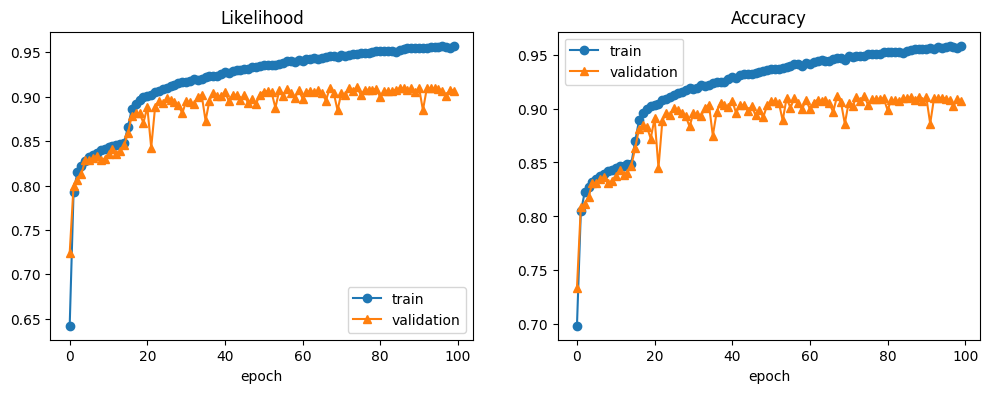

In [17]:
plot_history("05")

### Baseline model | experiment #6

**Architecture:**
```
StochasticCNN(
  (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Sigmoid()
  (6): Conv2d(24, 24, kernel_size=(2, 2), stride=(2, 2))
  (7): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (9): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Sigmoid()
  (11): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (12): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Sigmoid()
  (14): Conv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (15): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1))
  (17): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (18): Sigmoid()
  (19): Conv2d(192, 192, kernel_size=(2, 2), stride=(2, 2))
  (20): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (21): Flatten(start_dim=1, end_dim=-1)
  (22): Linear(in_features=192, out_features=100, bias=True)
  (23): Sigmoid()
  (24): Linear(in_features=100, out_features=10, bias=True)
)
```

**Number of epochs:** 100

**Batch size:** 128

**Learning rate**: `1e-3`

**Loss**: negative likelihood

In [20]:
!python main.py -c ../experiments/exp-b06/config-b06.yaml

reading config file...
setting up the experiment...
building model...
100%|█████████████████████████████████████████| 25/25 [00:00<00:00, 4935.17it/s]

model:
StochasticCNN(
  (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Sigmoid()
  (6): Conv2d(24, 24, kernel_size=(2, 2), stride=(2, 2))
  (7): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (9): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Sigmoid()
  (11): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (12): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Sigmoid()
  (14): Conv2d(96, 96, kernel_size=

	train likelihood: 0.9432392885843913, val likelihood: 0.9132693697929383
	train accuracy 0.94435, val accuracy: 0.9144
Epoch: 49 / 100
	train likelihood: 0.9445677251180014, val likelihood: 0.9102014921188355
	train accuracy 0.9455333333333333, val accuracy: 0.9111
Epoch: 50 / 100
	train likelihood: 0.9454559188842774, val likelihood: 0.9152389290809632
	train accuracy 0.9466166666666667, val accuracy: 0.9158
Epoch: 51 / 100
	train likelihood: 0.946147452545166, val likelihood: 0.9088206252098083
	train accuracy 0.9471833333333334, val accuracy: 0.9097
Epoch: 52 / 100
	train likelihood: 0.9475012757619222, val likelihood: 0.9149004116058349
	train accuracy 0.9484, val accuracy: 0.916
Epoch: 53 / 100
	train likelihood: 0.9471531499226888, val likelihood: 0.9141763821601868
	train accuracy 0.94825, val accuracy: 0.9152
Epoch: 54 / 100
	train likelihood: 0.948484377670288, val likelihood: 0.9083053565979003
	train accuracy 0.94945, val accuracy: 0.9091
Epoch: 55 / 100
	train likelihood: 

<Figure size 640x480 with 0 Axes>

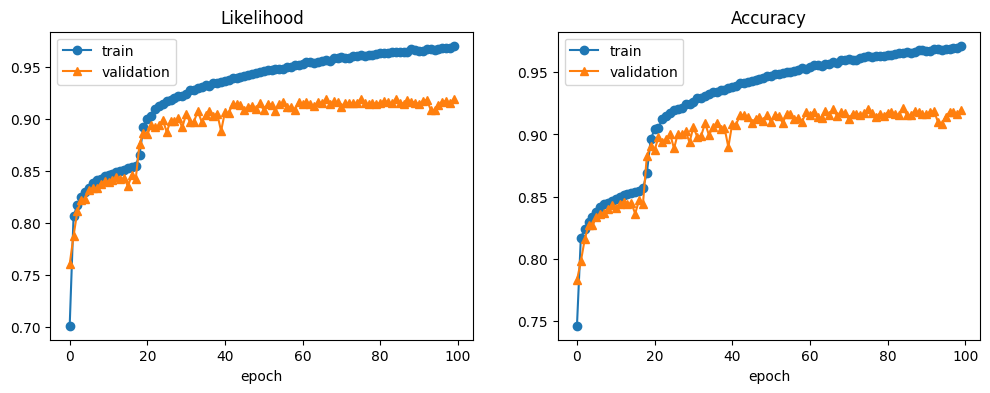

In [21]:
plot_history("06")

## Baseline model experiments #3 | tests <a class="anchor" id="exp-03-t"></a>

In [14]:
CLASSES = [
    "T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [15]:
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Using device:", dev)

# load experiment configuration file
with open("../experiments/exp-b03/config-b03.yaml") as config:
    params = dict(yaml.load(config, Loader=yaml.FullLoader))

# load model
net = StochasticCNN(params["model"], params["n_for_features"])
net.load_state_dict(torch.load("../experiments/exp-b03/baseline-03-statedict.pt"))
net = net.to(dev)

Using device: cuda


100%|██████████| 22/22 [00:00<00:00, 1299.48it/s]


In [16]:
# load data
params["normalize_params"] = list(map(float, params["normalize_params"].strip().split(",")))
params["normalize_params"] = {
    "mean": params["normalize_params"][0],
    "std": params["normalize_params"][1]
}
t = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(**params["normalize_params"])
])

test_set = FashionMNIST('../data', download=True, train=False, transform=t)
test_loader = DataLoader(test_set, batch_size=len(test_set))

In [17]:
softmax = torch.nn.Softmax(dim=1)

for (data, target) in test_loader:
    data = data.to(dev)
    y = softmax(net.forward(data))
    
    preds = torch.argmax(y, dim=1).cpu()

In [18]:
assert preds.size() == target.size(), "! unmatched sizes of target and model prediction"

### Test accuracy

In [19]:
acc = float((target == preds).sum() / target.size(0))
print(f"Test accuracy = ", acc)

Test accuracy =  0.8472999930381775


### Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(target, preds)

<Figure size 640x480 with 0 Axes>

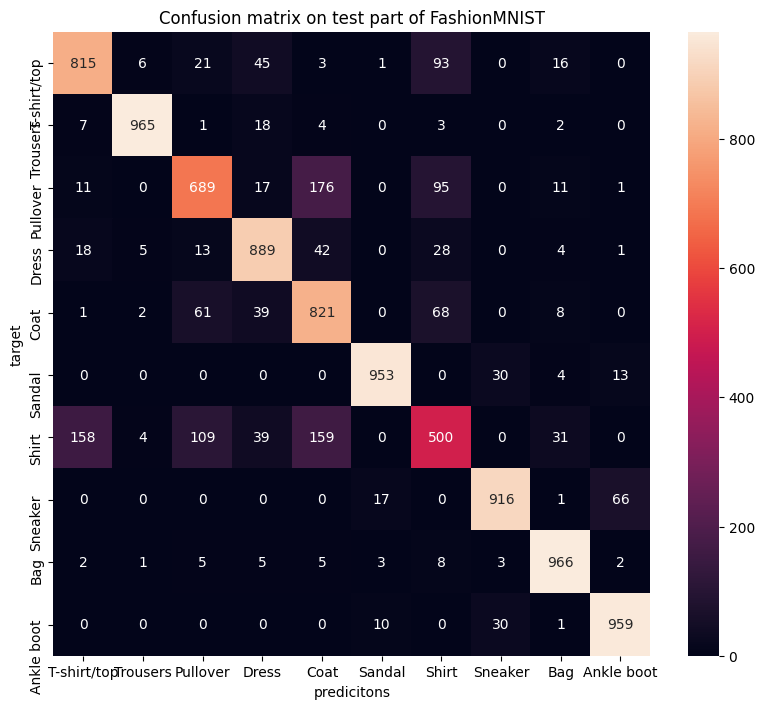

In [22]:
plt.clf()
plt.figure(figsize=(8, 7))

ax = sns.heatmap(cm, annot=True, fmt="g")

ax.set_title("Confusion matrix on test part of FashionMNIST")
ax.figure.tight_layout()
ax.set_xlabel("predicitons")
ax.set_ylabel("target")
ax.xaxis.set_ticklabels(CLASSES)
ax.yaxis.set_ticklabels(CLASSES)

plt.show()

### tSNE plot of features extracted by model

In [23]:
from sklearn.manifold import TSNE

In [24]:
test_loader = DataLoader(test_set, batch_size=5000)

for i, (data, t_target) in enumerate(test_loader):
    data = data.to(dev)
    features = net.features(data)
    
features = features.cpu().detach().numpy()

tsne = TSNE(n_components=2, random_state=0)
features_2d = tsne.fit_transform(features)

<Figure size 640x480 with 0 Axes>

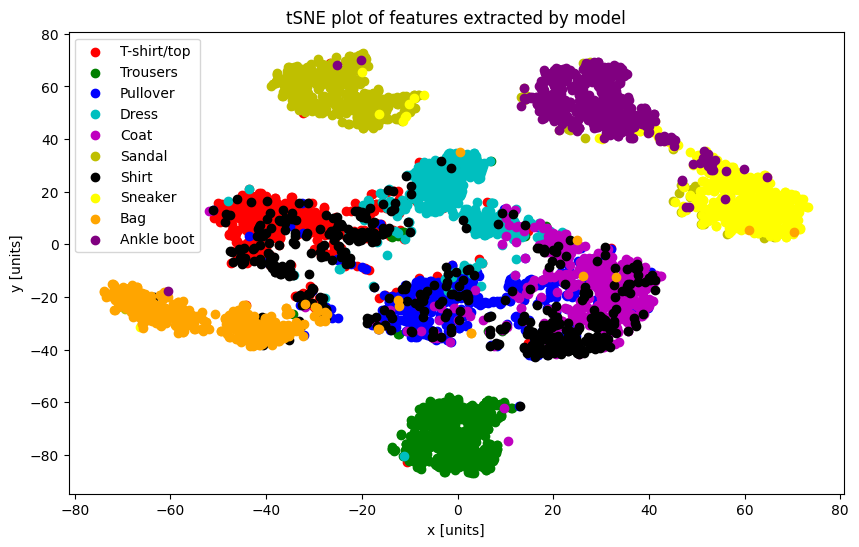

In [25]:
plt.clf()

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'purple']

for i in range(10):
    idx = np.where(t_target == i)[0]
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], color=colors[i], label=CLASSES[i])

plt.xlabel("x [units]")
plt.ylabel("y [units]")
plt.title("tSNE plot of features extracted by model")
plt.legend()

plt.show()

### Bounds on the generalization error

### Bayes-Stability [1]

Data based upper bound on model generalization error.

$$min(2C\mathbb{E}_x\sqrt{\mathcal{D}_{KL}(P || Q_z)}), 2C\mathbb{E}_x\sqrt{\mathcal{D}_{KL}(Q_z || P)}))$$

where $C$ is the upper bound on the loss function values.

### Generaliation error

**?** i.e. the gap between the 0\1 loss on train set and data set. [1]

### Model certainty

In [26]:
y = y.cpu().detach().numpy()

<Figure size 640x480 with 0 Axes>

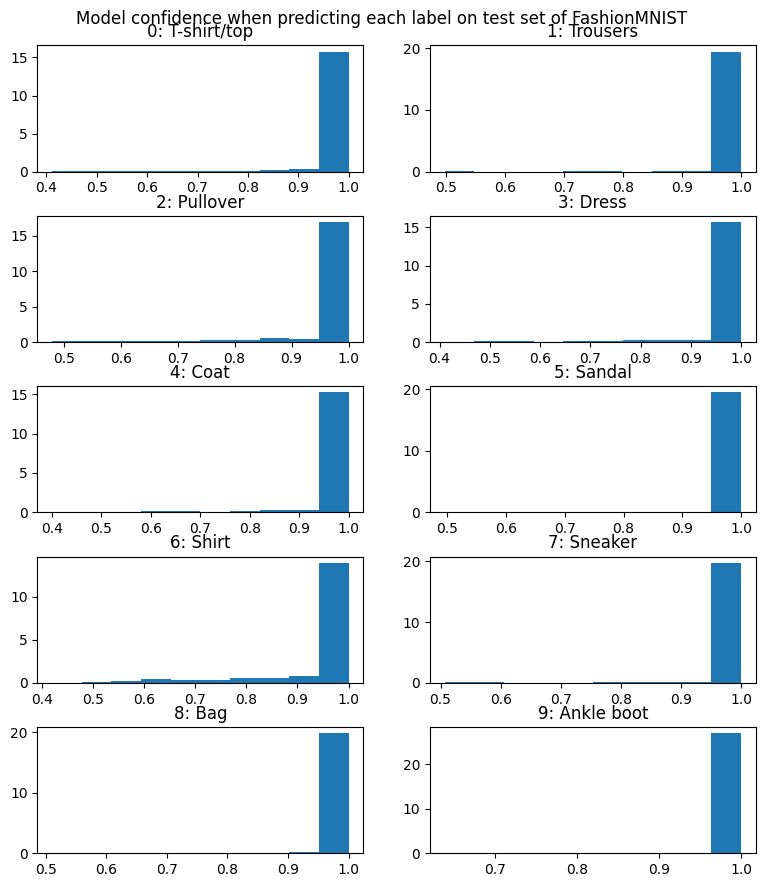

In [27]:
plt.clf()

fig, axs = plt.subplots(5, 2, figsize=(8, 9))
fig.suptitle("Model confidence when predicting each label on test set of FashionMNIST")
fig.tight_layout()

for l in range(10):
    axs.flat[l].hist(y[preds == l, l], bins=10, density=True)
    axs.flat[l].set_title(f"{l}: {CLASSES[l]}", )

plt.show()

### Rejection cost

### Calibration curves

In [28]:
from sklearn.calibration import calibration_curve

<Figure size 640x480 with 0 Axes>

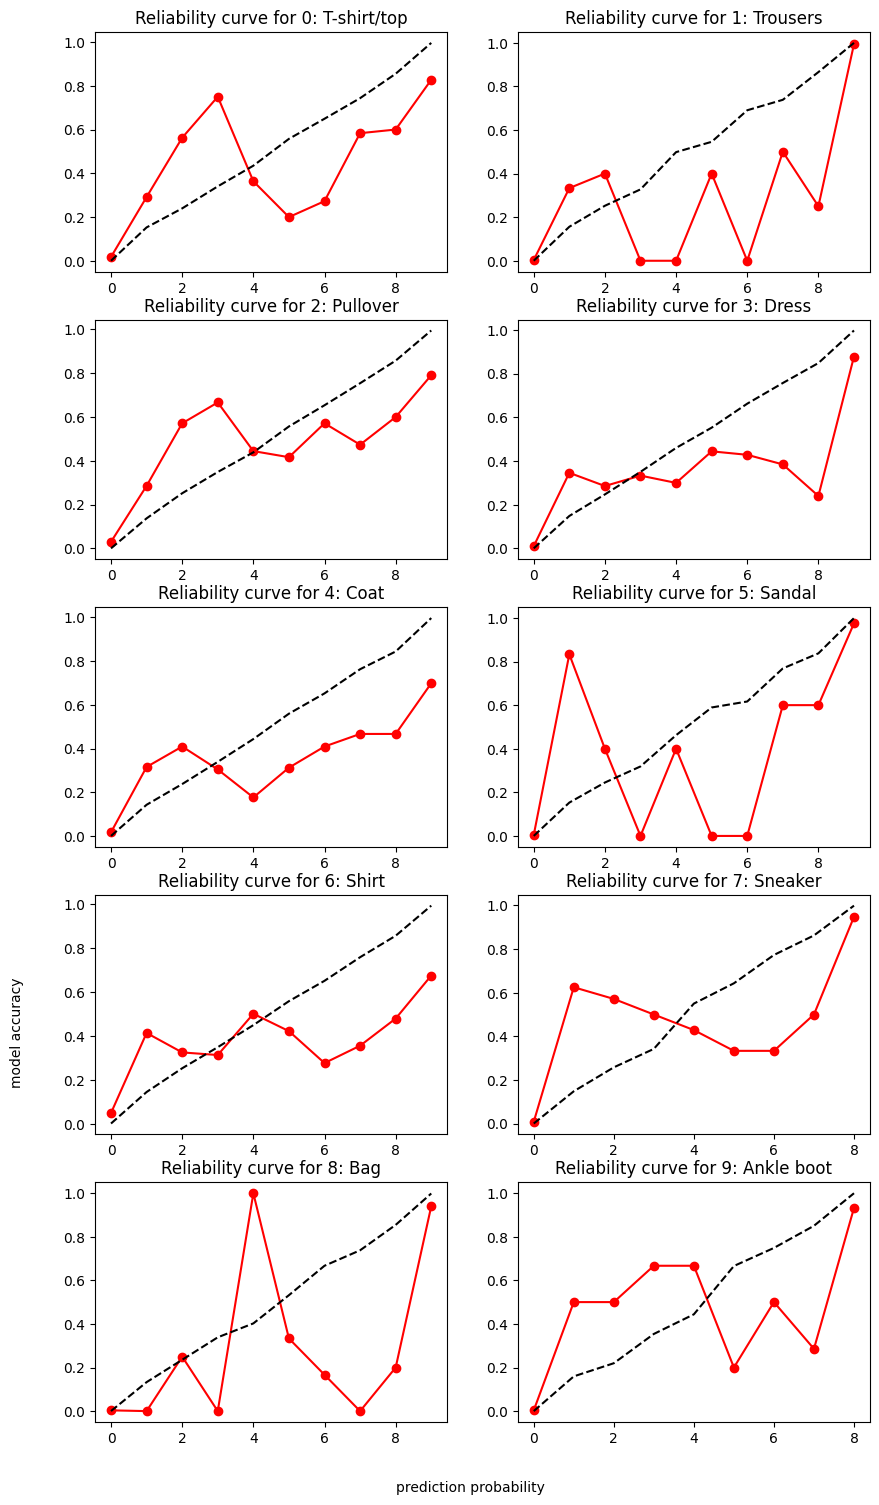

In [29]:
plt.clf()

fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for l in range(10):
    l_target = np.zeros(target.size(0))
    l_target[target == l] = 1
    l_p = y[:, l]
    prob_true, prob_pred = calibration_curve(l_target, l_p, n_bins=10)
    
    axs.flat[l].plot(prob_true, 'ro-')
    axs.flat[l].plot(prob_pred, 'k--',)
    axs.flat[l].set_title(f"Reliability curve for {l}: {CLASSES[l]}")

fig.text(0.5, 0.04, "prediction probability", ha='center')
fig.text(0.04, 0.5, "model accuracy", va='center', rotation='vertical')
plt.subplots_adjust(top=1.5)    
plt.show()

### Robustness against missing features

In [30]:
n = len(test_set)
test_loader = DataLoader(test_set, batch_size=n)

for (data, target) in test_loader:
    data[:, :,  :14] = torch.zeros((n, 1, 14, 28))
    data = data.to(dev)
    
    y = softmax(net.forward(data))
    preds = torch.argmax(y, dim=1).cpu()
    
acc = float((target == preds).sum() / target.size(0))
print(f"Accuracy on the left half of image =", acc)

Accuracy on the left half of image = 0.4478999972343445


In [31]:
for (data, target) in test_loader:
    data[:, :,  14:] = torch.zeros((n, 1, 14, 28))
    data = data.to(dev)
    
    y = softmax(net.forward(data))
    preds = torch.argmax(y, dim=1).cpu()
    
acc = float((target == preds).sum() / target.size(0))
print(f"Accuracy on the right half of image =", acc)

Accuracy on the right half of image = 0.6492999792098999


In [32]:
for (data, target) in test_loader:
    data[:, :,  :, :14] = torch.zeros((n, 1, 28, 14))
    data = data.to(dev)
    
    y = softmax(net.forward(data))
    preds = torch.argmax(y, dim=1).cpu()
    
acc = float((target == preds).sum() / target.size(0))
print(f"Accuracy on the upper half of image =", acc)

Accuracy on the upper half of image = 0.5238999724388123


In [33]:
for (data, target) in test_loader:
    data[:, :,  :, 14:] = torch.zeros((n, 1, 28, 14))
    data = data.to(dev)
    
    y = softmax(net.forward(data))
    preds = torch.argmax(y, dim=1).cpu()
    
acc = float((target == preds).sum() / target.size(0))
print(f"Accuracy on the lower half of image =", acc)

Accuracy on the lower half of image = 0.5195000171661377


In [34]:
for (data, target) in test_loader:
    noise = torch.randn(n, 1, 28, 28)
    noise[noise < 0] = 0
    noise[noise > 0] = 1
    data *= noise
    data = data.to(dev)
    
    y = softmax(net.forward(data))
    preds = torch.argmax(y, dim=1).cpu()
    
acc = float((target == preds).sum() / target.size(0))
print(f"Accuracy on original data with multiplicative noise =", acc)
print(f"Ratio of missing features =", 1 - float(noise.mean()))

Accuracy on original data with multiplicative noise = 0.47839999198913574
Ratio of missing features = 0.5000437498092651


### Robustness against adversarial attacks

In [37]:
s_idx = (target == 6).nonzero()  # shirt 
c_idx = (target == 4).nonzero()  # coat

<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

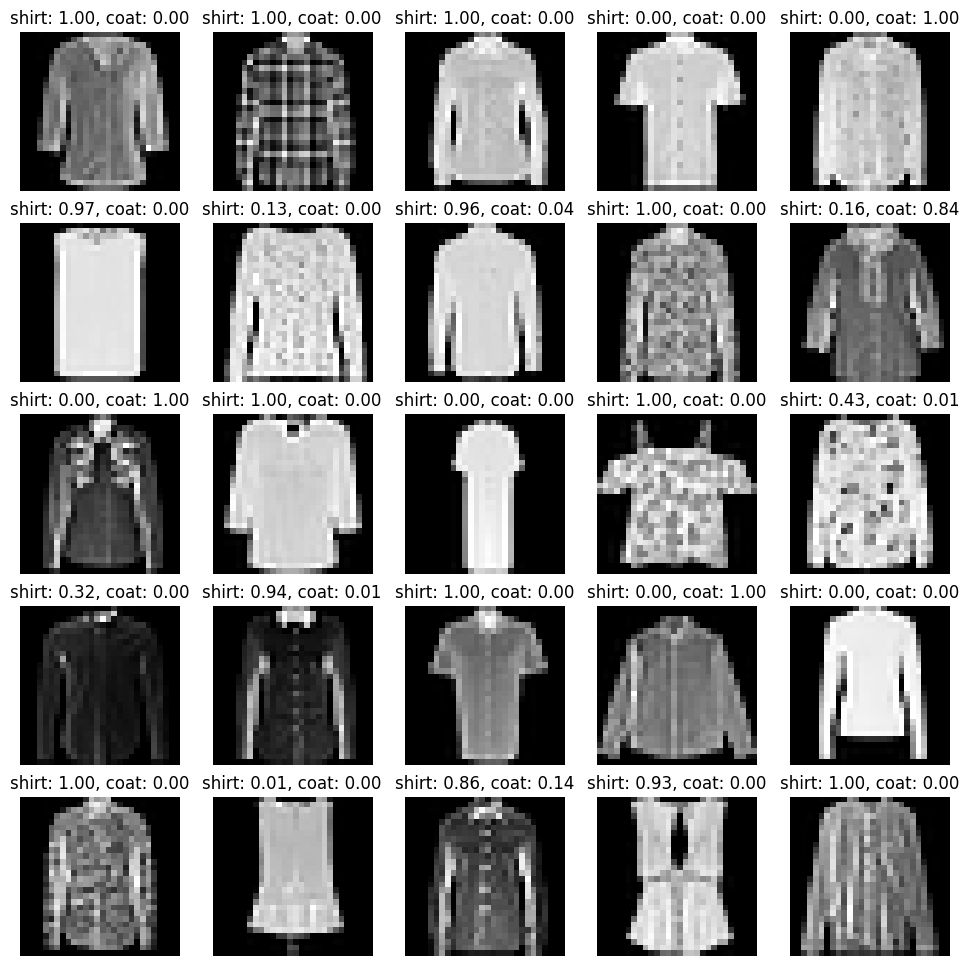

In [69]:
N = 25

plt.clf()

fig, axs = plt.subplots(5, 5, figsize=(12, 12))
# fig.tight_layout()

net.eval()
for i in range(N):
    batch = torch.unsqueeze(test_set[s_idx[i, 0]][0], 0).to(dev)
    ps = torch.squeeze(softmax(net.forward(batch)), 0)
    
    axs.flat[i].imshow(test_set[s_idx[i, 0]][0][0], cmap="gray")
    axs.flat[i].set_axis_off()
    axs.flat[i].set_title(f"shirt: {ps[6]:.2f}, coat: {ps[4]:.2f}")
    
plt.show()

In [65]:
target_class = 4  # coat
EPOCHS = 100
EPS = 3.4

inp_batch = torch.unsqueeze(test_set[0][0], 0).to(dev)
x = inp_batch.clone()
x.requires_grad = True

optimizer = torch.optim.Adam(params=[x], lr=0.01)

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    
    ps = softmax(net.forward(x))
    obj = -ps[0, target_class]
    obj.backward()
    optimizer.step()
    
    dx = x.detach() - inp_batch
    dn = dx.flatten().norm()
    div = torch.clamp(dn / EPS, min=1.0)
    dx = dx / div
    x.data = inp_batch + dx
    
    print(f"Epoch {epoch + 1}/{EPOCHS} - target class probability = {ps[0, target_class]}")

Epoch 1/100 - target class probability = 1.213296352275961e-09
Epoch 2/100 - target class probability = 1.2808389904250816e-09
Epoch 3/100 - target class probability = 1.3549376065569163e-09
Epoch 4/100 - target class probability = 1.4366348111138905e-09
Epoch 5/100 - target class probability = 1.5272376696628953e-09
Epoch 6/100 - target class probability = 1.6283149273377262e-09
Epoch 7/100 - target class probability = 1.7418364528509755e-09
Epoch 8/100 - target class probability = 1.870254395797133e-09
Epoch 9/100 - target class probability = 2.0166266434529234e-09
Epoch 10/100 - target class probability = 2.1848312048433627e-09
Epoch 11/100 - target class probability = 2.3798771842109545e-09
Epoch 12/100 - target class probability = 2.6081361514940227e-09
Epoch 13/100 - target class probability = 2.8779214567009603e-09
Epoch 14/100 - target class probability = 3.2000380123520245e-09
Epoch 15/100 - target class probability = 3.5887153249092307e-09
Epoch 16/100 - target class probabil

In [74]:
plt.clf()

plt.imshow(torch.squeeze(x.cpu().data, 0))
plt.show()

RuntimeError: CUDA error: unspecified launch failure

In [67]:
inp_batch = torch.unsqueeze(test_set[22][0], 0).to(dev)
x = inp_batch.clone()
x.requires_grad = True

optimizer = torch.optim.Adam(params=[x], lr=0.01)

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    
    ps = softmax(net.forward(x))
    obj = -ps[0, target_class]
    obj.backward()
    optimizer.step()
    
    dx = x.detach() - inp_batch
    dn = dx.flatten().norm()
    div = torch.clamp(dn / EPS, min=1.0)
    dx = dx / div
    x.data = inp_batch + dx
    
    print(f"Epoch {epoch + 1}/{EPOCHS} - target class probability = {ps[0, target_class]}")

Epoch 1/100 - target class probability = 6.238912858558265e-11
Epoch 2/100 - target class probability = 6.250359257942151e-11
Epoch 3/100 - target class probability = 6.261813983998721e-11
Epoch 4/100 - target class probability = 6.273265934497729e-11
Epoch 5/100 - target class probability = 6.28481156006444e-11
Epoch 6/100 - target class probability = 6.296330123944927e-11
Epoch 7/100 - target class probability = 6.307917382875061e-11
Epoch 8/100 - target class probability = 6.319526152376298e-11
Epoch 9/100 - target class probability = 6.331181412466691e-11
Epoch 10/100 - target class probability = 6.342808916981468e-11
Epoch 11/100 - target class probability = 6.354494014315648e-11
Epoch 12/100 - target class probability = 6.366249194478257e-11
Epoch 13/100 - target class probability = 6.378039069110386e-11
Epoch 14/100 - target class probability = 6.389825474295563e-11
Epoch 15/100 - target class probability = 6.40168335008795e-11
Epoch 16/100 - target class probability = 6.4135627

## Baseline model experiments #4 | tests <a class="anchor" id="exp-04-t"></a>

In [75]:
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Using device:", dev)

# load experiment configuration file
with open("../experiments/exp-b04/config-b04.yaml") as config:
    params = dict(yaml.load(config, Loader=yaml.FullLoader))

# load model
net = StochasticCNN(params["model"], params["n_for_features"])
net.load_state_dict(torch.load("../experiments/exp-b04/baseline-04-statedict.pt"))
net = net.to(dev)

Using device: cuda


100%|██████████| 22/22 [00:00<00:00, 6429.84it/s]


RuntimeError: CUDA error: unspecified launch failure

In [76]:
# load data
params["normalize_params"] = list(map(float, params["normalize_params"].strip().split(",")))
params["normalize_params"] = {
    "mean": params["normalize_params"][0],
    "std": params["normalize_params"][1]
}
t = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(**params["normalize_params"])
])

test_set = FashionMNIST('../data', download=True, train=False, transform=t)
test_loader = DataLoader(test_set, batch_size=len(test_set))

In [77]:
softmax = torch.nn.Softmax(dim=1)

for (data, target) in test_loader:
    data = data.to(dev)
    y = softmax(net.forward(data))
    
    preds = torch.argmax(y, dim=1).cpu()

RuntimeError: CUDA error: unspecified launch failure

### Test accuracy

In [ ]:
acc = float((target == preds).sum() / target.size(0))
print("Test accuracy =", acc)

### Confusion matrix

In [ ]:
cm = confusion_matrix(target, preds)

In [ ]:
plt.clf()
plt.figure(figsize=(8, 7))

ax = sns.heatmap(cm, annot=True, fmt="g")

ax.set_title("Confusion matrix on test part of FashionMNIST");
ax.figure.tight_layout()
ax.set_xlabel("predicitons")
ax.set_ylabel("target")
ax.xaxis.set_ticklabels(CLASSES)
ax.yaxis.set_ticklabels(CLASSES)

plt.show()

### tSNE plot of features extracted by model

In [ ]:
test_loader = DataLoader(test_set, batch_size=5000)

for i, (data, target) in enumerate(test_loader):
    data = data.to(dev)
    features = net.features(data)
    
features = features.cpu().detach().numpy()

tsne = TSNE(n_components=2, random_state=0)
features_2d = tsne.fit_transform(features)

In [78]:
plt.clf()

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'purple']

for i in range(10):
    idx = np.where(target == i)[0]
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], color=colors[i], label=CLASSES[i])

plt.xlabel("x [units]")
plt.ylabel("y [units]")
plt.title("tSNE plot of features extracted by model")
plt.legend()

plt.show()

IndexError: index 5010 is out of bounds for axis 0 with size 5000

### Model certainty

In [79]:
y = y.cpu().detach().numpy()

RuntimeError: CUDA error: unspecified launch failure

In [80]:
plt.clf()

fig, axs = plt.subplots(5, 2, figsize=(8, 9))
fig.suptitle("Model confidence when predicting each label on test set of FashionMNIST")
fig.tight_layout()

for l in range(10):
    axs.flat[l].hist(y[preds == l, l], bins=10, density=True)
    axs.flat[l].set_title(f"{l}: {CLASSES[l]}", )

plt.show()

RuntimeError: CUDA error: unspecified launch failure

## Refereces <a class="anchor" id="ref"></a>

[1] arXiv:1902.00621 \[cs.LG\]
